# Recommendation Engine

Name: SAI AKHIL SN | Batch date: 27 Jan 2021

#### Business problem:
To build a recommender system by using cosine simillarties score.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('C://Users/oftog/Downloads/Book_re.csv',encoding='latin1')

In [3]:
data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
data=data.drop(['Unnamed: 0'],axis=1)

In [5]:
data=data.rename(columns={'User.ID':'ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'})
data

,ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [7]:
data.describe()

,ID,Book_Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [8]:
data.isnull().sum()

ID             0
Book_Title     0
Book_Rating    0
dtype: int64

In [9]:
data.corr()

,ID,Book_Rating
ID,1.000000,-0.041523
Book_Rating,-0.041523,1.000000


In [10]:
df=data.copy()

In [11]:
df.head(2)

,ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3


In [12]:
df.ID.unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [13]:
n_users = df.ID.unique().shape[0]
n_users

2182

In [14]:
B_items = df.Book_Title.unique().shape[0]
B_items

9659

In [15]:
book_df = df.pivot_table(index='ID',
                   columns='Book_Title',
                   values='Book_Rating').reset_index(drop=True)

In [16]:
book_df

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
book_df.fillna(0, inplace=True)
book_df

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One of the most basic metrics you can think of is the ranking to decide which top 250 books are based on their respective ratings.

### Computing Average rating of books

In [18]:
AVG = df['Book_Rating'].mean()
print(AVG)

7.5663


Next, let's calculate the number of ratings  received by a book in the 90th percentile. The pandas library makes this task extremely trivial using the .quantile() method of pandas:

In [19]:
# Calculate the minimum number of votes required to be in the chart, 
minimum = data['Book_Rating'].quantile(0.90)
print(minimum)

10.0


In [20]:
# Filter out all qualified Books into a new DataFrame
q_Books = data.copy().loc[data['Book_Rating'] >= minimum]
q_Books.shape

(1732, 3)

In [21]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [22]:
uc_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
uc_sim.shape

(2182, 2182)

In [23]:
uc_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [24]:

#Store the results in a dataframe
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = df.ID.unique()
uc_sim_df.columns = df.ID.unique()

In [25]:
uc_sim_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
uc_sim_df.idxmax(axis=1)[0:125]

276726    276726
276729    276729
276736    276736
276737    276737
276744    276744
           ...  
277139    277139
277143    277143
277157    277157
277159    277159
277165    277165
Length: 125, dtype: int64

In [27]:
users=df[(df['ID']==276726) | (df['ID']==17)]
users

,ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
2413,17,Conversations With Dogbert: A Dilbert Book,7
2414,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,17,You Don't Need Experience if You've Got Attitude,6
2416,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [28]:
user_1=df[(df['ID']==276726)] 
user_1

,ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5


In [29]:
user_2=df[(df['ID']==17)] 
user_2

,ID,Book_Title,Book_Rating
2413,17,Conversations With Dogbert: A Dilbert Book,7
2414,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,17,You Don't Need Experience if You've Got Attitude,6
2416,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [30]:
indices = pd.Series(df.index, index=df['Book_Title']).drop_duplicates()

In [31]:
indices[:10]

Book_Title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

In [32]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Book_Title, cosine_sim=uc_sim):
    # Get the index of the books that matches the title
    idx = indices[Book_Title]

    # Get the pairwsie similarity scores of all books with that books
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[0:11]

    # Get the book indices
    books_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return df['Book_Title'].iloc[books_indices]

In [33]:
a=get_recommendations('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')
a

8     Under the Black Flag: The Romance and the Real...
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: Book_Title, dtype: object

In [34]:
b=get_recommendations('Classical Mythology')
b

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: Book_Title, dtype: object

In [35]:
pd.merge(user_1,user_2,on='Book_Rating',how='outer')

,ID_x,Book_Title_x,Book_Rating,ID_y,Book_Title_y
0,276726.0,Classical Mythology,5,17,The Dilbert Bunch: A Dilbert Book (Main Street...
1,NaN,NaN,7,17,Conversations With Dogbert: A Dilbert Book
2,NaN,NaN,6,17,You Don't Need Experience if You've Got Attitude
3,NaN,NaN,3,17,"The Boss: Nameless, Blameless and Shameless (A..."


In [36]:
book_user_rating = book_df["You Don't Need Experience if You've Got Attitude"]  

In [37]:
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: You Don't Need Experience if You've Got Attitude, Length: 2182, dtype: float64

In [38]:
#Finding the correlation with different movies
similar_to_book = book_df.corrwith(book_user_rating) 

In [39]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
Book_Title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [40]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
Book_Title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [41]:
ratings_mean_count = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].count())

In [42]:
plt.style.use('dark_background')

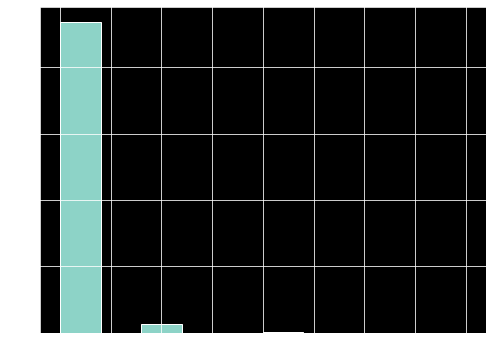

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

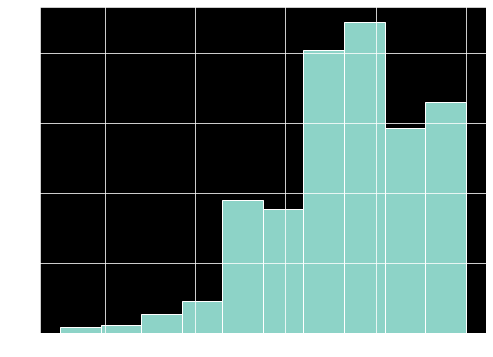

In [44]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Book_Rating'].hist(bins=10)

<Figure size 576x432 with 0 Axes>

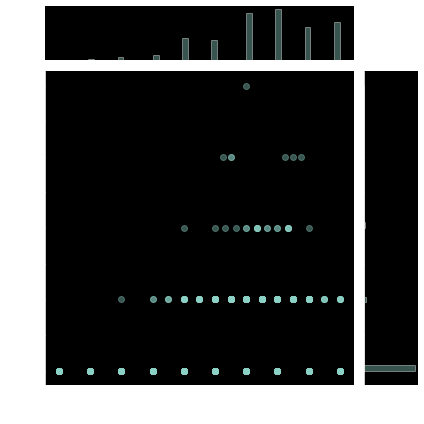

In [45]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Book_Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

### Outcomes
 
From the output you can see that the Books that have high correlation with " are not very well known.

This shows that correlation alone is not a good metric for similarity because there can be a user who wished to take those books  and only  other books and rated  them same.